### Teilaufgabe 1

Schreiben Sie eine Funktion, die den Heart-Datensatz in drei gleich große Teile teilt.

Die Zuordnung der Zeilen zu den jeweiligen Teilen soll zufällig geschehen.

Recherchieren Sie hierzu z.B. `numpy.random.permutation()`.

Die drei Teilmengen werden im folgenden Trainings-, Validierungs- und Testset genannt.

In [284]:
import pandas as pd
import numpy as np

df_heart = pd.read_csv("./datasets/heart.csv")
df_heart_random = np.random.permutation(df_heart)
df_heart_split = np.array_split(df_heart_random, 3)

df_heart_training = pd.DataFrame(df_heart_split[0], columns=df_heart.columns)
df_heart_validation = pd.DataFrame(df_heart_split[1], columns=df_heart.columns)
df_heart_test = pd.DataFrame(df_heart_split[2], columns=df_heart.columns)

print(f"{len(df_heart_split)} dataframes created from the original dataframe.")

3 dataframes created from the original dataframe.


### Teilaufgabe 2

Trainieren Sie auf den Trainingsdaten einen DecisionTreeClassifier wie in der Vorlesung gezeigt.

Achten Sie darauf, das für die vorliegende Datenskala korrekte Encoding anzuwenden.

Sie können Teil-Tabellen mit `pd.merge (df1, df2, ...)` oder `pd.concat([df1,df2],axis=1)` zusammenführen.


In [285]:
df_heart_training

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
1,55,M,NAP,136,228,0,ST,124,Y,1.6,Flat,1
2,54,M,NAP,150,232,0,LVH,165,N,1.6,Up,0
3,65,M,ASY,145,0,1,ST,67,N,0.7,Flat,1
4,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
301,63,M,ASY,110,252,0,ST,140,Y,2.0,Flat,1
302,37,M,ASY,120,223,0,Normal,168,N,0.0,Up,0
303,52,M,ATA,120,325,0,Normal,172,N,0.2,Up,0
304,48,M,ATA,110,229,0,Normal,168,N,1.0,Down,1


In [286]:
from sklearn.preprocessing import OrdinalEncoder


def prepare_data(df_1):
	enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
	X = df_1.iloc[:,:-1].copy()
	X = pd.DataFrame(enc.fit_transform(X.values), columns=X.columns)

	y = df_1.iloc[:,-1].copy().astype("int")

	return X, y, enc

X_train, y_train, enc_train = prepare_data(df_heart_training)
X_validation, y_validation, enc_validation = prepare_data(df_heart_validation)
X_test, y_test, enc_test = prepare_data(df_heart_test)

In [287]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 306 entries, 0 to 305
Series name: HeartDisease
Non-Null Count  Dtype
--------------  -----
306 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


[Text(0.5, 0.8333333333333334, 'x[10] <= 1.5\ngini = 0.495\nsamples = 306\nvalue = [137, 169]'),
 Text(0.25, 0.5, 'x[7] <= 85.5\ngini = 0.266\nsamples = 171\nvalue = [27, 144]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.238\nsamples = 167\nvalue = [23, 144]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.5, 'x[4] <= 1.0\ngini = 0.302\nsamples = 135\nvalue = [110, 25]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.36\nsamples = 17\nvalue = [4, 13]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.183\nsamples = 118\nvalue = [106, 12]')]

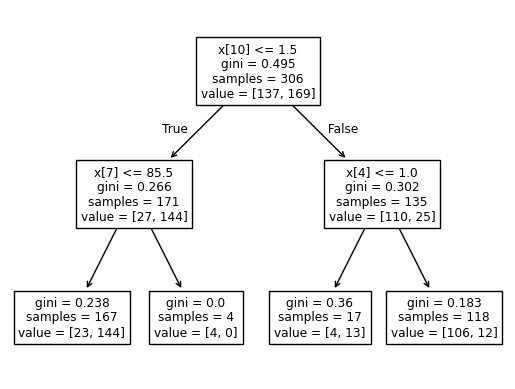

In [288]:
from sklearn import tree
clf_1 = tree.DecisionTreeClassifier( max_depth=2)
clf_1.fit(X_train, y_train)
tree.plot_tree(clf_1)

### Teilaufgabe 3

Stellen Sie verschiedene Tree Depths gegenüber `(max_depth=2, 3, ..., 8, 9)` und erstellen Sie eine Tabelle, die die Accuracy auf dem Trainingsdatensatz und dem Validierungsdatensatz gegenüberstellt.

Wählen Sie ein finales Modell.


In [289]:



def get_accuracy_for_tree(X_check, y_check, max_depth):
	# fit tree
	clf_train = tree.DecisionTreeClassifier(max_depth=max_depth)
	clf_train.fit(X_train, y_train)
	y_pred = clf_train.predict(X_check)

	# calculate accuracy
	TP = np.sum((y_check == 1) & (y_pred == 1))
	FP = np.sum((y_check == 0) & (y_pred == 1))
	TN = np.sum((y_check == 0) & (y_pred == 0))
	FN = np.sum((y_check == 1) & (y_pred == 0))
	return (TP + TN) / (TP + FP + TN + FN)

array = [[max_depth, get_accuracy_for_tree(X_test, y_test, max_depth), get_accuracy_for_tree(X_validation, y_validation, max_depth), get_accuracy_for_tree(X_train, y_train, max_depth)] for max_depth in range(2,10)]

pd.DataFrame(array, columns=["max_depth",  "accuracy on test set", "accuracy on validation set", "accuracy on training set"])

,max_depth,accuracy on test set,accuracy on validation set,accuracy on training set
0,2,0.849673,0.787582,0.872549
1,3,0.856209,0.794118,0.875817
2,4,0.839869,0.794118,0.908497
3,5,0.859477,0.797386,0.931373
4,6,0.839869,0.787582,0.954248
5,7,0.836601,0.767974,0.967320
6,8,0.843137,0.771242,0.977124
7,9,0.843137,0.781046,0.996732


### Teilaufgabe 4

Evaluieren Sie das finale Modell zusätzlich auf den Testdaten.

Warum genügt es nicht, die Performance auf den Validierungsdaten zu kennen?


=> Evalutation auf Test-Daten ist in der Tabelle der Teilaufgabe 3 zu finden

=> Finales Model ist jenes mit `max_depth=3`, jenes hat über einige Runs hinweg die größte Accuracy auf den Test und Validierungsdaten gezeigt.

Das zufällige durchmischen und dritteln des Ursprungsdatensatzes führt dazu, dass sich die Trainings-, Validierungs- und Testdatensätze von Run zu Run unterscheiden.

Teils ähneln sich die Daten des Trainings- und des Validierungsdatensatzes mehr, teils gibt es mehr Überschneidungen zwischen dem Trainings- und dem Testdatensatz. Dies spiegelt sich in den accuracies wieder.

Nur, in dem wir die Accuracy aller drei Datensätze vergleichen bekommen wir eine fundierte Einschätzung der Accuracy des Trees.